# Teste Cognitivo.AI

Importando dados e pacotes do Python

In [217]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets, linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import matplotlib.pyplot as plt


%matplotlib inline

In [133]:
# Carregando dados
base_vinho = pd.read_csv('c://users/matheus.meyer/winequality.csv', delimiter = ';')

In [134]:
base_vinho.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Verificando se existe dados missing na base e o formato das variáveis

In [135]:
base_vinho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null object
quality                 6497 non-null int64
dtypes: float64(10), int64(1), object(2)
memory usage: 659.9+ KB


Vamos transformar 'alcohol' em numerico e criar dumings pela cor do vinho

In [164]:
#criando dummings pela cor do vinho

bv = pd.get_dummies(base_vinho, columns=["type"], dtype= int)

In [165]:
bv.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_n,type_Red,type_White
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,0,1


In [166]:
bv.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_n', 'type_Red',
       'type_White'],
      dtype='object')

In [167]:
# transformando alcohol em float

bv.alcohol = pd.to_numeric(bv.alcohol, errors='coerce').fillna(0).astype(np.float64)

In [168]:
bv.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_n,type_Red,type_White
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,0,1


In [169]:
bv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 15 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
quality_n               6497 non-null int64
type_Red                6497 non-null int32
type_White              6497 non-null int32
dtypes: float64(11), int32(2), int64(2)
memory usage: 710.7 KB


In [170]:
# Analisando estatisticas descritivas

bv.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_n,type_Red,type_White
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,1.710882,3.218501,0.531268,10.424505,5.818378,0.195783,0.246114,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,7.636088,0.160787,0.148806,1.444884,0.873255,0.396833,0.430779,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000,0.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000,0.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000,0.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,103.898000,4.010000,2.000000,14.900000,9.000000,1.000000,1.000000,1.000000


Analise exploratória dos dados

In [173]:
# filtrando apenas vinhos tinto
bv_red = bv.loc[bv["type_Red"]==1,:]

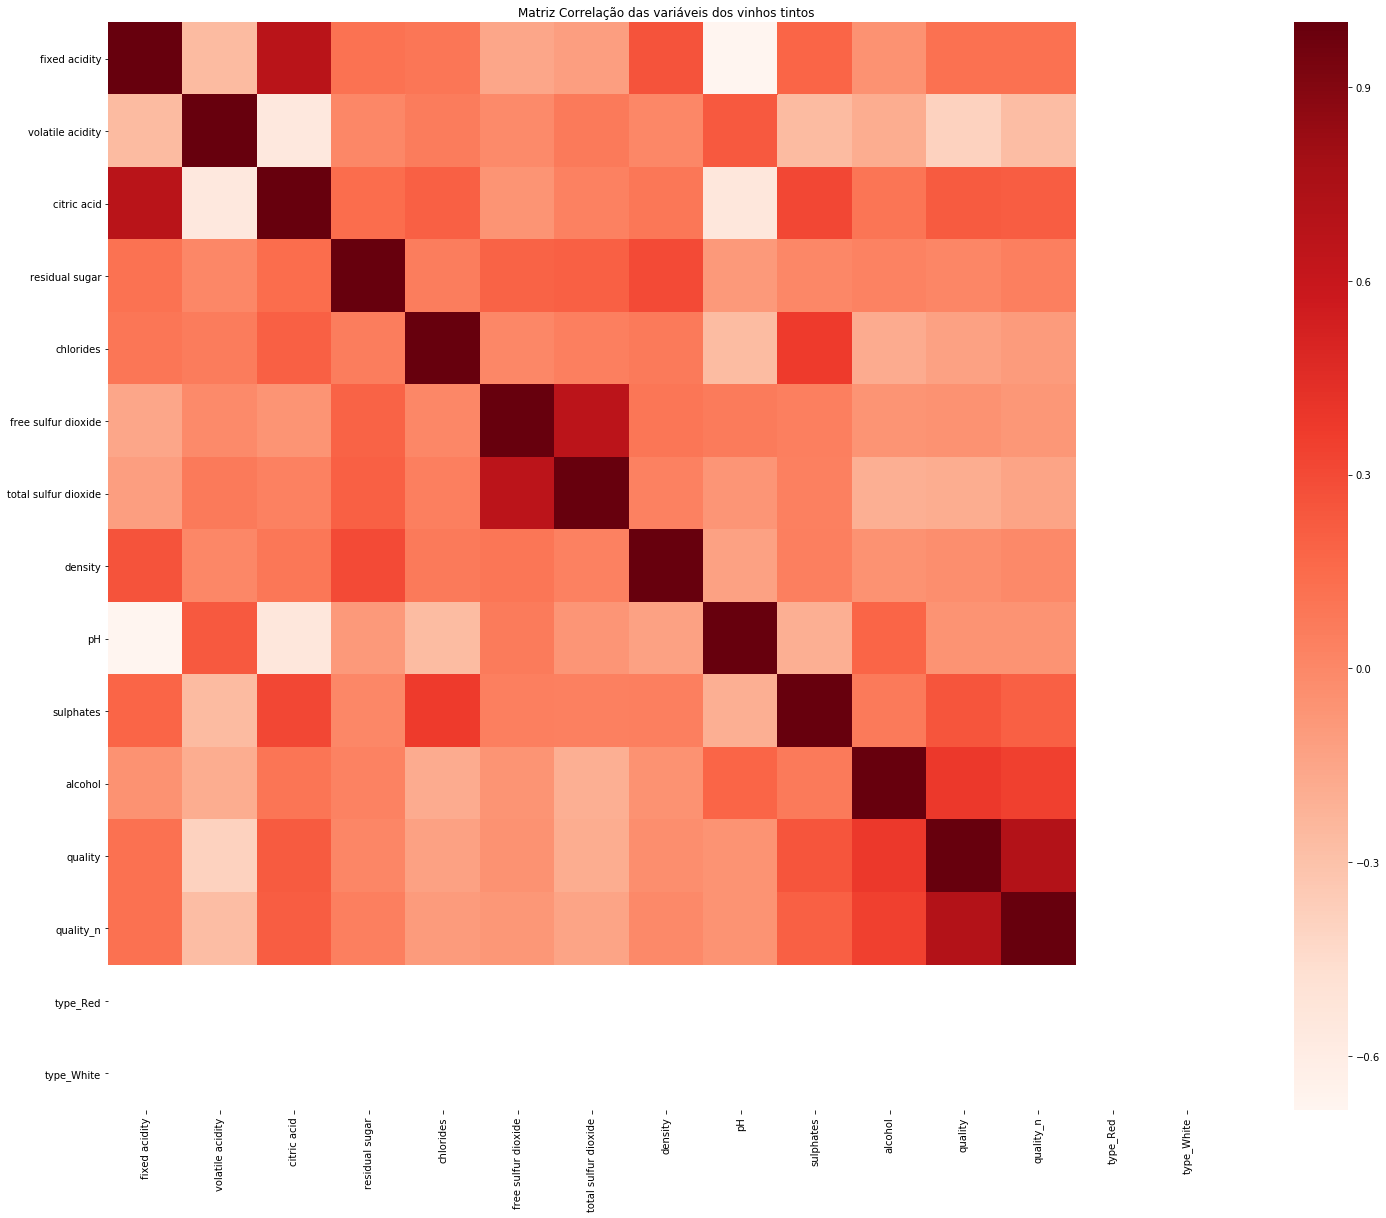

In [174]:
plt.subplots(figsize=(25,20))
ax = plt.axes()
ax.set_title("Matriz Correlação das variáveis dos vinhos tintos")
corr = bv_red.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="Reds")
plt.show()

In [175]:
# filtrando apenas vinhos branco
bv_white = bv.loc[bv["type_White"]==1,:]

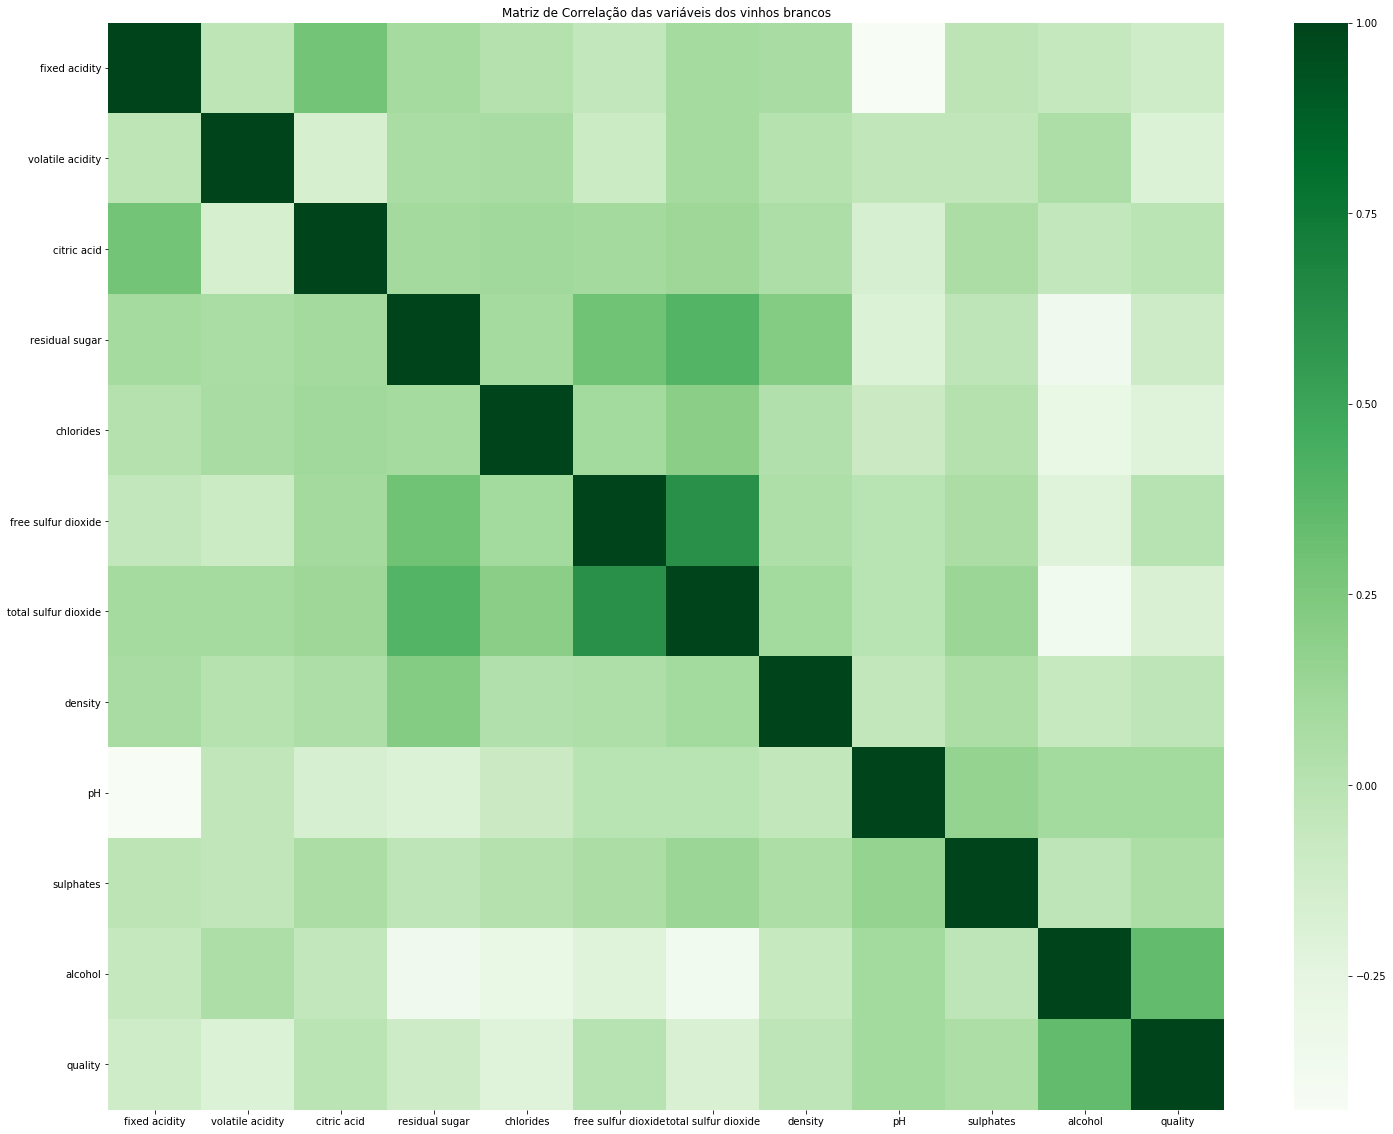

In [148]:
plt.subplots(figsize=(25,20))
ax = plt.axes()
ax.set_title("Matriz de Correlação das variáveis dos vinhos brancos")
corr = bv_white.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="Greens")
plt.show()

In [176]:
bv_red_corr=bv_red.corr()
bv_white_corr=bv_white.corr()

In [177]:
# Calculando a diferença de correlação entre os vinhos tinto e branco
diferenca_corr = bv_red_corr - bv_white_corr

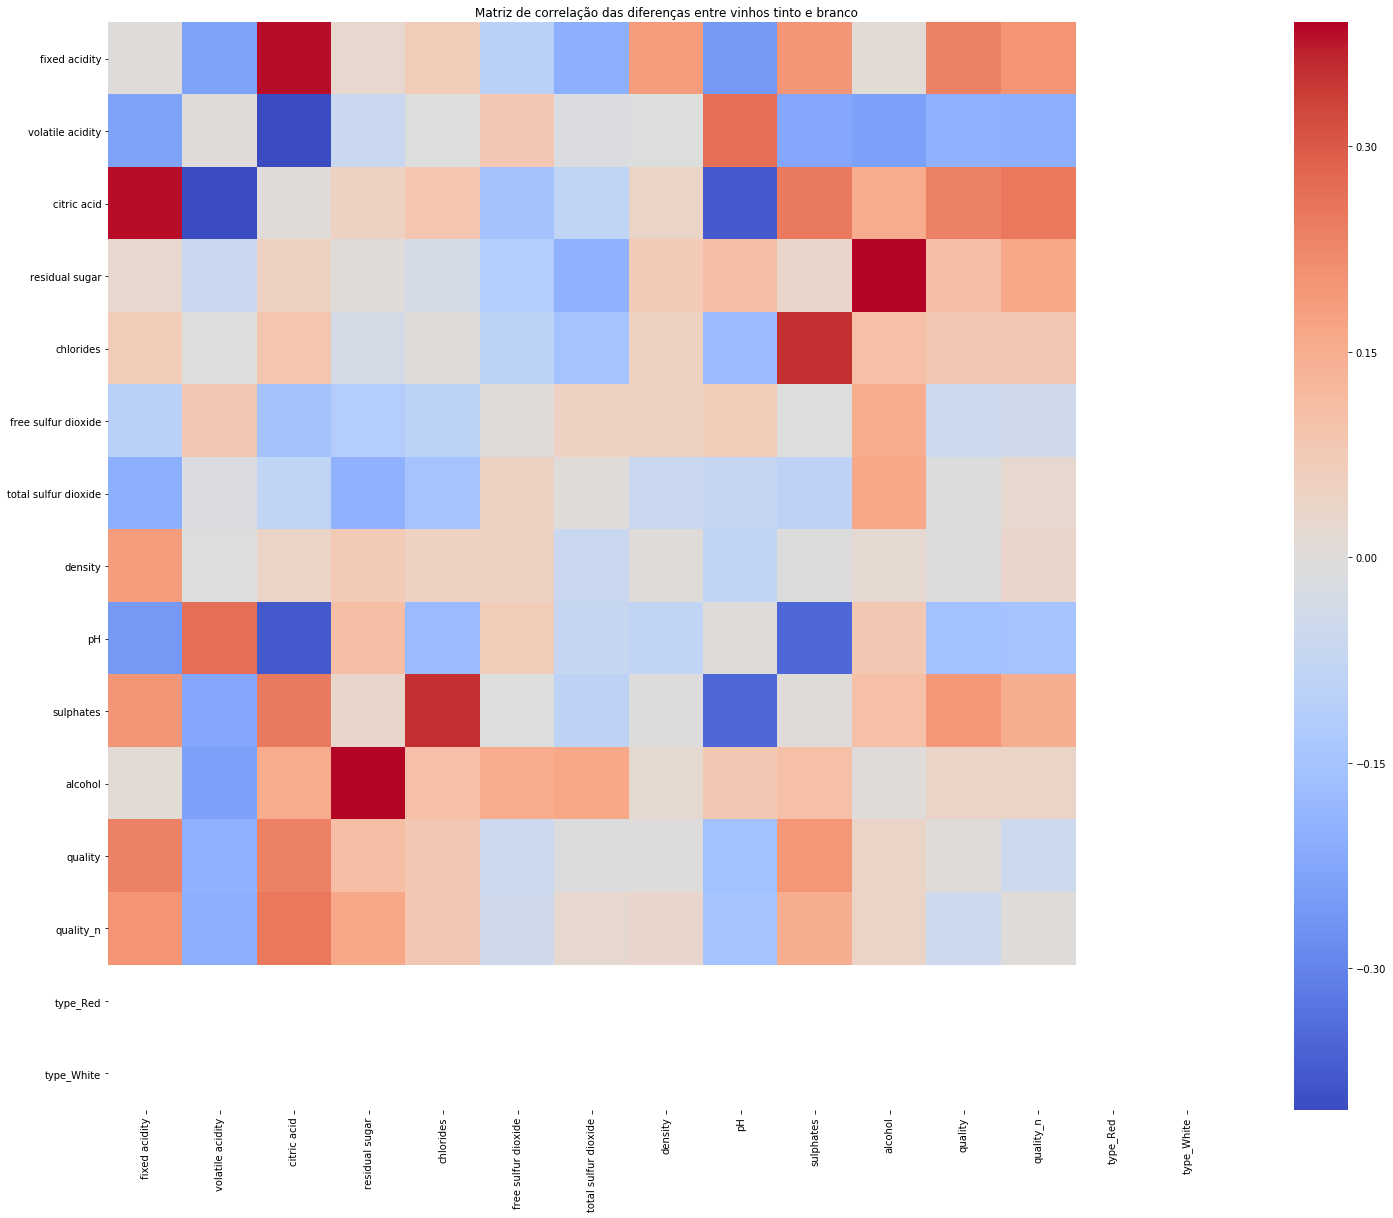

In [178]:
plt.subplots(figsize=(25,20))
ax = plt.axes()
ax.set_title("Matriz de correlação das diferenças entre vinhos tinto e branco")
corr = diferenca_corr
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="coolwarm")

Quanto mais forte as cores, maiores são as diferenças das correlações entre os vinhos tinto e branco.

In [179]:
bv.groupby('quality').size()

quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
dtype: int64

In [180]:
# Fazendo a classificação binária para a variável  da qualidade do vinho.
# Classificando os vinhos entre vinhos bons e ruins

bins = (2, 6.5, 8)
group_names = [0, 1]
bv['quality_n'] = pd.cut(bv['quality'], bins = bins, labels = group_names)

In [181]:
# transformando quality_n em numero

bv.quality_n = pd.to_numeric(bv.quality_n, errors='coerce').fillna(0).astype(np.int64)

In [182]:
#atribuindo label para qualidade

label_quality = LabelEncoder()

In [183]:
#Vinhos Ruim serão iguais a 0 e vinhos Bom serão iguais a 1

bv['quality_n']

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      1
14      0
15      1
16      0
17      1
18      0
19      0
20      1
21      1
22      1
23      0
24      0
25      0
26      0
27      0
28      0
29      1
       ..
6467    0
6468    0
6469    0
6470    0
6471    0
6472    0
6473    0
6474    0
6475    0
6476    0
6477    0
6478    0
6479    0
6480    0
6481    0
6482    1
6483    0
6484    0
6485    0
6486    0
6487    0
6488    0
6489    0
6490    0
6491    0
6492    0
6493    0
6494    0
6495    0
6496    0
Name: quality_n, Length: 6497, dtype: int64

In [184]:
bv['quality_n'].value_counts()

0    5225
1    1272
Name: quality_n, dtype: int64

In [234]:
# Separando a base de dados

x = bv.drop('quality', axis = 1)
y = bv['quality']

In [235]:
# Dividindo as bases de treino e teste

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 35)

In [236]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [237]:
bv.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
quality_n                 int64
type_Red                  int32
type_White                int32
dtype: object

Random Florest

In [238]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)

In [239]:
# Performace do modelo
print(classification_report(y_test, pred_rfc))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         4
          4       0.33      0.03      0.06        30
          5       0.69      0.71      0.70       420
          6       0.78      0.80      0.79       582
          7       0.82      1.00      0.90       211
          8       1.00      0.13      0.23        53

avg / total       0.75      0.76      0.74      1300



C:\Users\matheus.meyer\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [248]:
# Matrix de confusão do Random Forest
print(confusion_matrix(y_test, pred_rfc))

[[  0   0   4   0   0   0]
 [  0   1  19  10   0   0]
 [  0   1 299 120   0   0]
 [  0   1 114 467   0   0]
 [  0   0   0   0 211   0]
 [  0   0   0   0  46   7]]


In [241]:
accuracy_score(y_test, pred_rfc)

0.7576923076923077

O modelo obteve uma acurácia de 75,77%

SGD

In [242]:
sgd = SGDClassifier(penalty=None)
sgd.fit(x_train, y_train)
pred_sgd = sgd.predict(x_test)

C:\Users\matheus.meyer\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [243]:
print(classification_report(y_test, pred_sgd))

             precision    recall  f1-score   support

          3       0.33      0.25      0.29         4
          4       0.00      0.00      0.00        30
          5       0.53      0.60      0.56       420
          6       0.66      0.63      0.64       582
          7       0.80      0.84      0.82       211
          8       0.20      0.15      0.17        53
          9       0.00      0.00      0.00         0

avg / total       0.60      0.62      0.61      1300



C:\Users\matheus.meyer\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\matheus.meyer\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [244]:
accuracy_score(y_test, pred_sgd)

0.6176923076923077

O modelo obteve acurácia de 61,77%

Cross Validation Score para Random Forest

In [247]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = x_train, y = y_train, cv = 10)
rfc_eval.mean()

C:\Users\matheus.meyer\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.7837421496496636

A acurácia do Random Forest aumentou de 75,77% para 78,37% utilizando a Cross Validation Score